In [1]:
from ROOT import TFile,TTree,TCanvas,TH1F, gStyle, TLatex, gPad, TLegend, TLorentzVector, TH2F, TLine, TF1, TBox, RDataFrame, TPad, TF2
import ROOT
import numpy as np

Welcome to JupyROOT 6.22/06


In [2]:
gStyle.SetOptStat(0)
gStyle.SetHistLineWidth(2)
gStyle.SetTitleXSize(0.045)
gStyle.SetTitleYSize(0.035)
gStyle.SetTitleYOffset(1.2)
gStyle.SetPalette(55)
gStyle.SetNumberContours(50)

latex=TLatex()
latex.SetTextSize(0.03)

biglatex=TLatex()
biglatex.SetTextSize(0.045)

smalllatex=TLatex()
smalllatex.SetTextSize(0.022)

Create an RDataFrame by importing the root files from the analysis

In [3]:
ROOT.EnableImplicitMT()
d = RDataFrame("tree_postprocess", {"../../../data/fall2018-torus-1-v1-nSidis/may26_*.root",
                                    "../../../data/fall2018-torus+1-v1-nSidis/may26_*.root",
                                    "../../../data/spring2019-torus-1-v1-nSidis/may26_*.root"})

Define cuts

In [4]:
beta_cut = "abs(beta1-1)< 0.02 && abs(beta2-1) < 0.02"

Load up Mdiphoton histogram

In [20]:
h = d.Filter(beta_cut).Histo1D(("h",";z;Counts",1000,0,0.95),"z")
hsig = d.Filter(beta_cut + " && Mdiphoton > 0.108 && Mdiphoton < 0.16").Histo1D(("hsig",";z;Counts",1000,0,0.95),"z")
hbg = d.Filter(beta_cut + " && Mdiphoton > 0.17 && Mdiphoton < 0.4").Histo1D(("hbg",";z;Counts",1000,0,0.95),"z")
helse = d.Filter(beta_cut + " && (Mdiphoton < 0.108 || Mdiphoton > 0.4)").Histo1D(("helse",";z;Counts",1000,0,0.95),"z")

Plot histogram

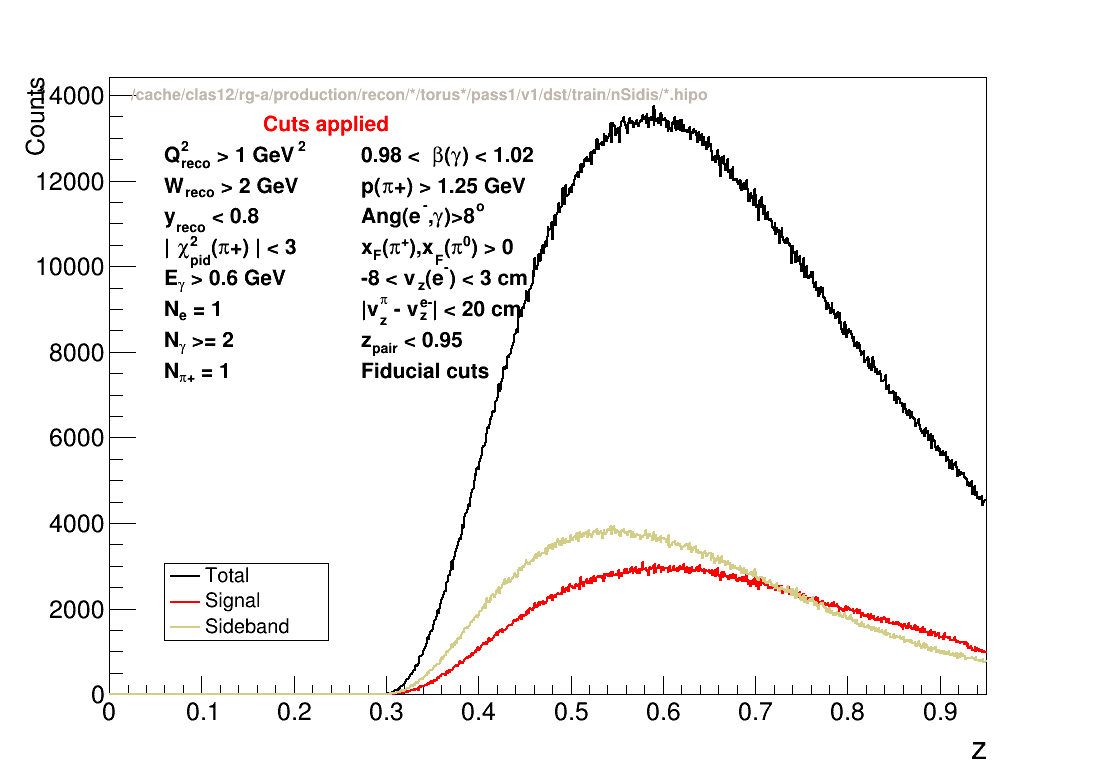

In [21]:
c = TCanvas("c","c",1100,800)
h.SetLineColor(1)
hsig.SetLineColor(2)
hbg.SetLineColor(41)
h.Draw("hist")
hsig.Draw("hist same")
hbg.Draw("hist same")
smalllatex.DrawLatexNDC(.12,.87,"#color[11]{/cache/clas12/rg-a/production/recon/*/torus*/pass1/v1/dst/train/nSidis/*.hipo}")
#latex.DrawLatexNDC(.54,.8,"#it{CLAS}12 10.6 GeV Analysis")
latex.DrawLatexNDC(.24,.83,"#color[2]{Cuts applied}")
latex.DrawLatexNDC(.15,.79,"Q^{2}_{reco} > 1 GeV^{2}")
latex.DrawLatexNDC(.15,.75,"W_{reco} > 2 GeV")
latex.DrawLatexNDC(.15,.71,"y_{reco} < 0.8 ")
latex.DrawLatexNDC(.15,.67,"| #chi^{2}_{pid}(#pi+) | < 3 ")
latex.DrawLatexNDC(.15,.63,"E_{#gamma} > 0.6 GeV")
latex.DrawLatexNDC(.15,.59,"N_{e} = 1 ")
latex.DrawLatexNDC(.15,.55,"N_{#gamma} >= 2 ")
latex.DrawLatexNDC(.15,.51,"N_{#pi+} = 1 ")
latex.DrawLatexNDC(0.33,0.79,"0.98 < #beta(#gamma) < 1.02")
latex.DrawLatexNDC(0.33,0.75,"p(#pi+) > 1.25 GeV")
latex.DrawLatexNDC(0.33,0.71,"Ang(e^{-},#gamma)>8^{o}")
latex.DrawLatexNDC(0.33,0.67,"x_{F}(#pi^{+}),x_{F}(#pi^{0}) > 0")
latex.DrawLatexNDC(0.33,0.63,"-8 < v_{z}(e^{-}) < 3 cm")
latex.DrawLatexNDC(0.33,0.59,"|v_{z}^{#pi} - v_{z}^{e-}| < 20 cm")
latex.DrawLatexNDC(0.33,0.55,"z_{pair} < 0.95")
latex.DrawLatexNDC(0.33,0.51,"Fiducial cuts")

legend=TLegend(0.15,0.17,0.3,0.27)
legend.AddEntry(h.GetValue(),"Total","l")
legend.AddEntry(hsig.GetValue(),"Signal","l")
legend.AddEntry(hbg.GetValue(),"Sideband","l")
legend.Draw("same")
c.Draw()